<a href="https://colab.research.google.com/github/ddarshana04/Automatic-Fish-species-detection-and-classification/blob/main/fish_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshanadurgamahanty","key":"136a5ec1de378020be14f68abd48fb1d"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [01:51<00:00, 32.7MB/s]
100% 3.24G/3.24G [01:51<00:00, 31.3MB/s]


In [ ]:
! unzip a-large-scale-fish-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00448.png  
  inflating: Fish_Dataset/Fish_Dataset/

In [ ]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
path = "NA_Fish_Dataset"
!mkdir fish_dataset
fishes = []
for name in os.listdir(path):
    if os.path.isdir(os.path.join(path, name)):
        fishes.append(name)
for fish in fishes:
    fish_image_folder = os.path.join(path, fish)
    shutil.copytree(fish_image_folder, os.path.join(fish))

In [ ]:
print(os.listdir("/content/NA_Fish_Dataset/Gilt Head Bream"))
print(os.listdir("/content/NA_Fish_Dataset/Gilt Head Bream")[:3])

['4.JPG', '7.JPG', '33.JPG', '29.JPG', '17.JPG', '23.JPG', '44.JPG', '30.JPG', '47.JPG', '41.JPG', '9.JPG', '14.JPG', '22.JPG', '50.JPG', '10.JPG', '46.JPG', '38.JPG', '18.JPG', '5.JPG', '1.JPG', '48.JPG', '16.JPG', '21.png', '19.JPG', '3.JPG', '20.JPG', '25.JPG', '12.JPG', '2.JPG', '49.JPG', '26.JPG', '43.JPG', '27.JPG', '35.JPG', '40.JPG', '8.JPG', '37.JPG', '39.JPG', '6.JPG', '32.JPG', '34.JPG', '11.JPG', '36.JPG', '42.JPG', '31.JPG', '15.JPG', '24.JPG', '28.JPG', '13.JPG', '45.JPG']
['4.JPG', '7.JPG', '33.JPG']


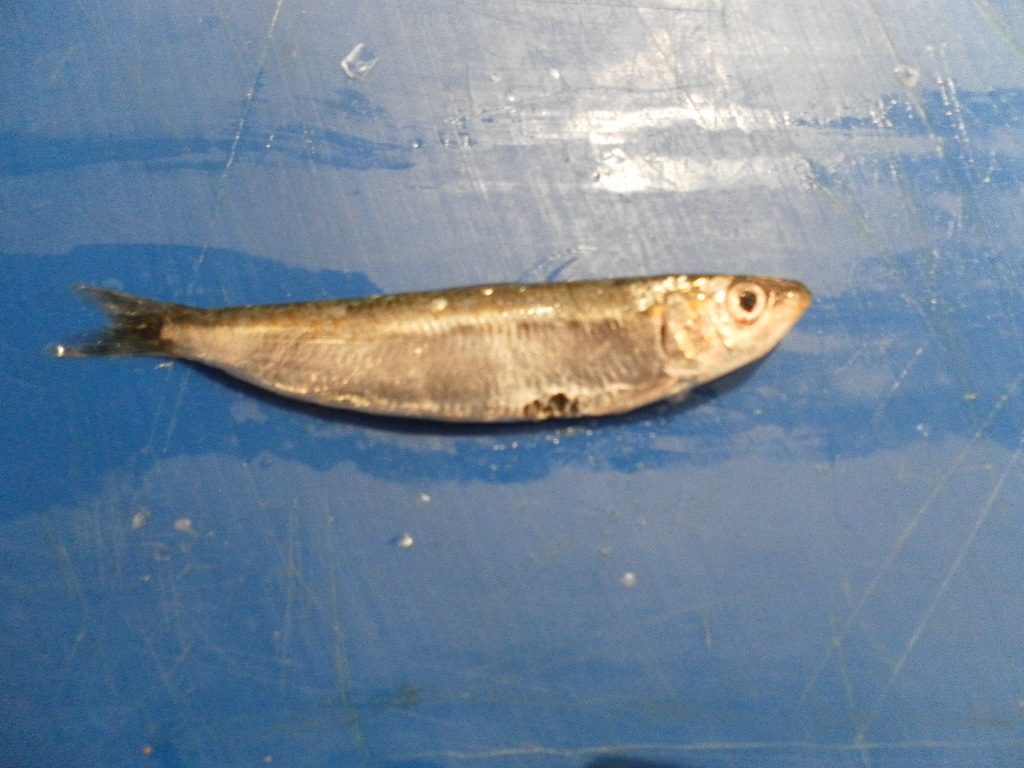

In [ ]:
from PIL import Image as im
from PIL import ImageOps
img = im.open("/content/NA_Fish_Dataset/Black Sea Sprat/00001.png")
# ImageOps.grayscale(img)
img

In [ ]:
# Creating the training and validation set
img_size = (224, 224)
batch_size = 32
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/NA_Fish_Dataset",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="training",
)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/NA_Fish_Dataset",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=1,
    validation_split=0.2,
    subset="validation",
)

Found 430 files belonging to 9 classes.
Using 344 files for training.
Found 430 files belonging to 9 classes.
Using 86 files for validation.


In [ ]:
model = keras.Sequential([
    layers.Input((224, 224, 3)),

    layers.Conv2D(16, 3, activation="relu"),
    layers.BatchNormalization(), # Regularization
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2), # Regularization
    layers.Dense(9, activation="softmax"),
])

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(learning_rate=0.0001),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"],
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 32)     128       
 hNormalization)                                                 
                                                        

In [ ]:
model.fit(ds_train, batch_size=64, epochs=50, verbose=2, validation_data=ds_validation)

Epoch 1/50
11/11 - 16s - loss: 2.0679 - accuracy: 0.3430 - val_loss: 12.8580 - val_accuracy: 0.1047 - 16s/epoch - 1s/step
Epoch 2/50
11/11 - 6s - loss: 0.6418 - accuracy: 0.8052 - val_loss: 8.9675 - val_accuracy: 0.1047 - 6s/epoch - 555ms/step
Epoch 3/50
11/11 - 6s - loss: 0.3746 - accuracy: 0.9273 - val_loss: 5.8211 - val_accuracy: 0.1047 - 6s/epoch - 556ms/step
Epoch 4/50
11/11 - 6s - loss: 0.2378 - accuracy: 0.9593 - val_loss: 4.0247 - val_accuracy: 0.1744 - 6s/epoch - 553ms/step
Epoch 5/50
11/11 - 6s - loss: 0.1653 - accuracy: 0.9942 - val_loss: 2.9866 - val_accuracy: 0.2558 - 6s/epoch - 562ms/step
Epoch 6/50
11/11 - 7s - loss: 0.1104 - accuracy: 0.9971 - val_loss: 2.3892 - val_accuracy: 0.3140 - 7s/epoch - 669ms/step
Epoch 7/50
11/11 - 6s - loss: 0.1015 - accuracy: 1.0000 - val_loss: 2.0025 - val_accuracy: 0.3605 - 6s/epoch - 553ms/step
Epoch 8/50
11/11 - 6s - loss: 0.0799 - accuracy: 0.9971 - val_loss: 1.7234 - val_accuracy: 0.4767 - 6s/epoch - 552ms/step
Epoch 9/50
11/11 - 6s - 

In [ ]:
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/NA_Fish_Dataset",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    seed=1,
    validation_split=0.6,
    subset="validation",
)

Found 430 files belonging to 9 classes.
Using 258 files for validation.


In [ ]:
type(model)

keras.engine.sequential.Sequential

In [ ]:
model.evaluate(ds_test)

9/9 [==============================] - 4s 33ms/step - loss: 0.3026 - accuracy: 0.9070


[0.30259475111961365, 0.9069767594337463]

In [ ]:
import cv2
import matplotlib
import numpy as np
import glob
import random
from keras.models import load_model
from PIL import ImageFont, ImageDraw, Image
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
model.save('classs_model_new1.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Fish = {0:"Black Sea Sprat",
        1:"Gilt-Head Bream",
        2:"Hourse Mackerel",
        3:"Red Mullet",
        4:"Red Sea Bream",
        5:"Sea Bass",
        6:"Shrimp",
        7:"Striped Red Mullet",
        8:"Trout"}

In [ ]:
! wget "https://pjreddie.com/media/files/yolov3.weights"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"
!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2022-12-10 16:41:48--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  20.6MB/s    in 12s     

2022-12-10 16:42:01 (19.4 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]

--2022-12-10 16:42:01--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s   

In [ ]:
# Load Yolo
net = cv2.dnn.readNet("/content/drive/MyDrive/yolov3/yolov3_training_last.weights",r"/content/drive/MyDrive/yolov3/yolov3_testing.cfg")

In [ ]:
# Name custom object
classes = ["fish"]

# Images path
images_path = glob.glob(r"C:\Users\Wigig\Desktop\train_yolo_to_detect_custom_object\yolo_custom_detection\00002.PNG")

In [ ]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [ ]:
# Insert here the path of your images
random.shuffle(images_path)
# loop through all the images
for img_path in images_path:
    # Loading image
    img = cv2.imread(img_path)

    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    net.setInput(blob)
    outs = net.forward(output_layers)

    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                print(class_id)
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
        print(indexes)

        font = cv2.FONT_HERSHEY_PLAIN
        for i in range(len(boxes)):
          if i in indexes:
            x, y, w, h = boxes[i]

            color = colors[class_ids[i]]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        img = cv2.resize(img,(224,224))
        img2 = np.reshape(img,[1,224,224,3])
        res = str(Fish[np.argmax(model.predict(img2))])
        print(res)
        cv2.putText(img,res,(x, y + 30), font, 3, color, 2)
        cv2_im_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pil_im = Image.fromarray(cv2_im_rgb)
        draw = ImageDraw.Draw(pil_im)
        font1 = ImageFont.truetype("arial.ttf", 15)
        draw.text((0, 0),res, font=font1)
        cv2_im_processed = cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2BGR)
        cv2.imshow("Image", cv2_im_processed)
        cv2.imwrite('predicted.PNG', cv2_im_processed)
        key = cv2.waitKey(0)

cv2.destroyAllWindows()
